# Polynomial Regression



First Part:
Polynomial Transformation fucntion
Second Part:
- Generation of training data with non-linear relationship between features and labels. We generate examples with single feature $x_1$ and label y.
- Visualization of training data and model fitment

In [1]:
from IPython.display import display, Math, Latex
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#@title [Linear Regression Class]
class LinReg(object):
  '''
  Linear Regression model
  -----------------------
  y=X@w
  X:A feature matrix
  w: weight vector
  y:label vector
  '''
  def __init__(self):
    self.t0= 200
    self.t1 = 100000
  
  def predict(self,X:np.ndarray) -> np.ndarray:
    '''
    Prediction of output label for a given input.

    Args:
    X: Feature matrix for given inputs
    Returns:
    y: Output label vector as predicted by the given model.
    '''
    y=X@self.w
    return y

  def loss(self,X:np.ndarray,y:np.ndarray) -> float:
    '''
    Calculates loss for a model based on known labels

    Args:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Return:
    Loss
    '''
    e = y-self.predict(X)
    return (1/2)*(np.transpose(e)@e)

  def rmse(self, X,y):
    '''Calculates root mean squared error of prediction w.r.t actual label.'''
    return np.sqrt((2/X.shape[0])* self.loss(X,y))
  
  def fit(self,X:np.ndarray,y:np.ndarray) -> np.ndarray:
    '''Estimates parameters of the linear regression model with normal equation
    Args:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Returns:
    Weight vector
    '''
    self.w = np.linalg.pinv(X)@y
    return self.w

  def calculate_gradient(self,X,y):
    '''
    Calculate gradient of loss function w.r.t weight vector on training set.

    Arguments:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Returns:
    A vector of gradients.
    '''
    return np.transpose(X)@(self.predict(X)-y)

  def update_weights(self,grad,lr):
    return self.w-lr*grad

  def learning_schedule(self,t):
    return self.t0/(t+self.t1)

  def gd(self,X,y,num_epochs,lr):
    self.w = np.zeros((X.shape[1]))
    self.w_all, self.err_all = [],[]
    for i in np.arange(0,num_epochs):
      dJdW = self.calculate_gradient(X,y)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      self.w = self.update_weights(dJdW,lr)
    return self.w

  def mbgd(self,X,y,num_epochs,batch_size):
    self.w = np.zeros((X.shape[1]))
    self.w_all, self.err_all = [],[]
    mini_batch_id=0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0,X.shape[0],batch_size):
        mini_batch_id+=1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))

        dJdW = 2/batch_size * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(dJdW, self.learning_schedule(mini_batch_id))
    return self.w

  def sgd(self,X,y,num_epochs:int):
    self.w_all,self.err_all = [],[]
    self.w= np.zeros((X.shape[1]))
    

    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index = np.random.randint(X.shape[0])
        xi =X[random_index:random_index+1]
        yi =y[random_index:random_index+1]
        self.err_all.append(self.loss(xi,yi))

        gradients = 2 * self.calculate_gradient(xi,yi)
        lr = self.learning_schedule(epoch*X.shape[0]+i)

        self.w=self.update_weights(gradients,lr)
        self.w_all.append(self.w)
    return self.w

In [3]:
lin_reg = LinReg()

## Polynomial Transformation

In [4]:
import itertools
import functools

def get_combinations(x, degree):
  return itertools.combinations_with_replacement(x,degree)

def compute_new_feature(items):
  #reduce(lambda x,y:x*y, [1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
  return functools.reduce(lambda x, y:x*y,items)
  


In [ ]:
for item in get_combinations([1,2],3):
  print(item)

(1, 1, 1)
(1, 1, 2)
(1, 2, 2)
(2, 2, 2)


In [ ]:
for item in get_combinations(np.array([[2,4],[3,5]]),3):
  print(item)

(array([2, 4]), array([2, 4]), array([2, 4]))
(array([2, 4]), array([2, 4]), array([3, 5]))
(array([2, 4]), array([3, 5]), array([3, 5]))
(array([3, 5]), array([3, 5]), array([3, 5]))


In [7]:
for item in get_combinations(np.array([1,2,3]),4):
  print(item)

(1, 1, 1, 1)
(1, 1, 1, 2)
(1, 1, 1, 3)
(1, 1, 2, 2)
(1, 1, 2, 3)
(1, 1, 3, 3)
(1, 2, 2, 2)
(1, 2, 2, 3)
(1, 2, 3, 3)
(1, 3, 3, 3)
(2, 2, 2, 2)
(2, 2, 2, 3)
(2, 2, 3, 3)
(2, 3, 3, 3)
(3, 3, 3, 3)


In [ ]:
compute_new_feature((1,3,4))

12

In [ ]:
{items: compute_new_feature(items) for items in get_combinations([1],3)}

{(1, 1, 1): 1}

In [ ]:
d={items: compute_new_feature(items) for items in get_combinations([1,2,3,4,5,6],4)}
len(d)

126

In [ ]:
{items: compute_new_feature(items) for items in get_combinations([2,3],3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [ ]:
{items: compute_new_feature(items) for items in get_combinations([1,4],4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 4): 4,
 (1, 1, 4, 4): 16,
 (1, 4, 4, 4): 64,
 (4, 4, 4, 4): 256}

In [ ]:
#Implementation adopted from (https://github.com/ctgk/PRML/blob/master/prml/preprocess/polynomial.py)
def polynomial_transform(x, degree,logging=False):
  #Converts to feature matrix
  if x.ndim==1:
    x=x[:,None]
  x_t = x.transpose() #Transpose the feature matrix
  features = [np.ones(len(x))] #Populates 1s as first feature of each example
  print('feature-initial',features)
  if logging:
    print("Input:",x)
  for degree in range(1,degree+1):
    for items in get_combinations(x_t,degree): #generate combinations
      features.append(compute_new_feature(items))
      if logging:
        print(items,":",compute_new_feature(items))
  if logging:
    print(np.asarray(features).transpose())
  return np.asarray(features).transpose()


In [ ]:
polynomial_transform(np.array([2]),3,logging=True)

feature-initial [array([1.])]
Input: [[2]]
(array([2]),) : [2]
(array([2]), array([2])) : [4]
(array([2]), array([2]), array([2])) : [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [ ]:
polynomial_transform(np.array([2,3,5,6]),3,logging=True)

feature-initial [array([1., 1., 1., 1.])]
Input: [[2]
 [3]
 [5]
 [6]]
(array([2, 3, 5, 6]),) : [2 3 5 6]
(array([2, 3, 5, 6]), array([2, 3, 5, 6])) : [ 4  9 25 36]
(array([2, 3, 5, 6]), array([2, 3, 5, 6]), array([2, 3, 5, 6])) : [  8  27 125 216]
[[  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]]


array([[  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.]])

In [ ]:
polynomial_transform(np.array([[2,3,5,6]]),3,logging=True)

feature-initial [array([1.])]
Input: [[2 3 5 6]]
(array([2]),) : [2]
(array([3]),) : [3]
(array([5]),) : [5]
(array([6]),) : [6]
(array([2]), array([2])) : [4]
(array([2]), array([3])) : [6]
(array([2]), array([5])) : [10]
(array([2]), array([6])) : [12]
(array([3]), array([3])) : [9]
(array([3]), array([5])) : [15]
(array([3]), array([6])) : [18]
(array([5]), array([5])) : [25]
(array([5]), array([6])) : [30]
(array([6]), array([6])) : [36]
(array([2]), array([2]), array([2])) : [8]
(array([2]), array([2]), array([3])) : [12]
(array([2]), array([2]), array([5])) : [20]
(array([2]), array([2]), array([6])) : [24]
(array([2]), array([3]), array([3])) : [18]
(array([2]), array([3]), array([5])) : [30]
(array([2]), array([3]), array([6])) : [36]
(array([2]), array([5]), array([5])) : [50]
(array([2]), array([5]), array([6])) : [60]
(array([2]), array([6]), array([6])) : [72]
(array([3]), array([3]), array([3])) : [27]
(array([3]), array([3]), array([5])) : [45]
(array([3]), array([3]), ar

array([[  1.,   2.,   3.,   5.,   6.,   4.,   6.,  10.,  12.,   9.,  15.,
         18.,  25.,  30.,  36.,   8.,  12.,  20.,  24.,  18.,  30.,  36.,
         50.,  60.,  72.,  27.,  45.,  54.,  75.,  90., 108., 125., 150.,
        180., 216.]])

In [ ]:
polynomial_transform(np.array([[2,3,4],[4,5,6]]),2,logging=True)

feature-initial [array([1., 1.])]
Input: [[2 3 4]
 [4 5 6]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([4, 6]),) : [4 6]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([2, 4]), array([4, 6])) : [ 8 24]
(array([3, 5]), array([3, 5])) : [ 9 25]
(array([3, 5]), array([4, 6])) : [12 30]
(array([4, 6]), array([4, 6])) : [16 36]
[[ 1.  2.  3.  4.  4.  6.  8.  9. 12. 16.]
 [ 1.  4.  5.  6. 16. 20. 24. 25. 30. 36.]]


array([[ 1.,  2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.],
       [ 1.,  4.,  5.,  6., 16., 20., 24., 25., 30., 36.]])

(2, 6)

In [ ]:
polynomial_transform(np.array([[2,3],[4,5]]),3,logging=True)

feature-initial [array([1., 1.])]
Input: [[2 3]
 [4 5]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([3, 5]), array([3, 5])) : [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4])) : [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5])) : [12 80]
(array([2, 4]), array([3, 5]), array([3, 5])) : [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5])) : [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
polynomial_transform(np.array([5]),0,logging=True)

feature-initial [array([1.])]
Input: [[5]]
[[1.]]


array([[1.]])

## Non-linear training data generation

In [ ]:
def create_nonlin_training_set(func,sample_size,std):
  x = np.linspace(0,1,sample_size)
  y=func(x)+np.random.normal(scale=std,size=x.shape)
  return x, y

def nonlin(x):
  return np.sin(2*np.pi*x)

## Visualization of training data and model fitment

In [ ]:
# @title [Visualization]
def visualize_training_data(X_train,y_train):
  points = np.linspace(0,1,100)
  output = nonlin(points)

  plt.scatter(X_train, y_train, facecolor="none"
  ,edgecolor="b",s=50, label="training data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.legend()
  plt.show()

def visualize_model_fit(X, y, lin_ref, degree):
  '''Plots trained model along with the data generation function'''
  points = np.linspace(0,1,100)
  output = nonlin(points)

  if degree>0:
    plt.scatter(X, y, facecolor="none", edgecolors="b",s=50,
                label="training data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")

  y_hat = lin_reg.predict(polynomial_transform(points,degree))
  plt.plot(points,y_hat,c="r",label="$h_\mathbf{w}(x)$")
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.ylim(-1.5,1.5)
  plt.title("M={}".format(degree)) #xy=(-0.15,1)
    


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[-0.05007247  0.79510207  0.75034146  0.76718775  0.33153181 -0.25303321
 -1.06492105 -0.99270428 -0.32502803 -0.05436176]


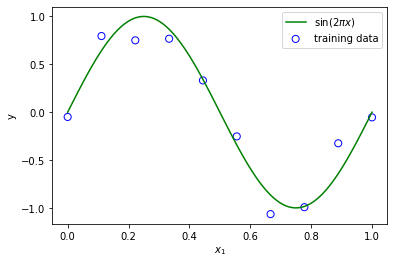

In [ ]:
num_samples=10
X,y = create_nonlin_training_set(nonlin,num_samples,0.2)
print(X)
print(y)
visualize_training_data(X,y)

## Polynomial Model

2
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
Input: [[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]
(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),) : [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])) : [0.         0.01234568 0.04938272 0.11111111 0.19753086 0.30864198
 0.44444444 0.60493827 0.79012346 1.        ]
[[1.         0.         0.        ]
 [1.         0.11111111 0.01234568]
 [1.         0.22222222 0.04938272]
 [1.         0.33333333 0.11111111]

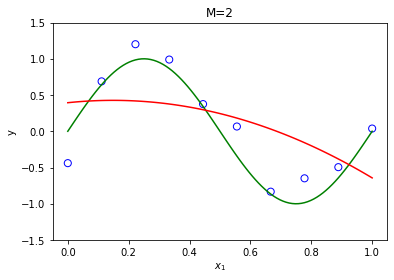

In [ ]:
degree=int(input())
X_transform = polynomial_transform(X,degree,logging=True)
lin_reg.fit(X_transform,y)
print(X_transform.shape)
print(lin_reg.w)
visualize_model_fit(X,y,lin_reg,degree)


Multiple polynomial regression models with different degrees

feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 

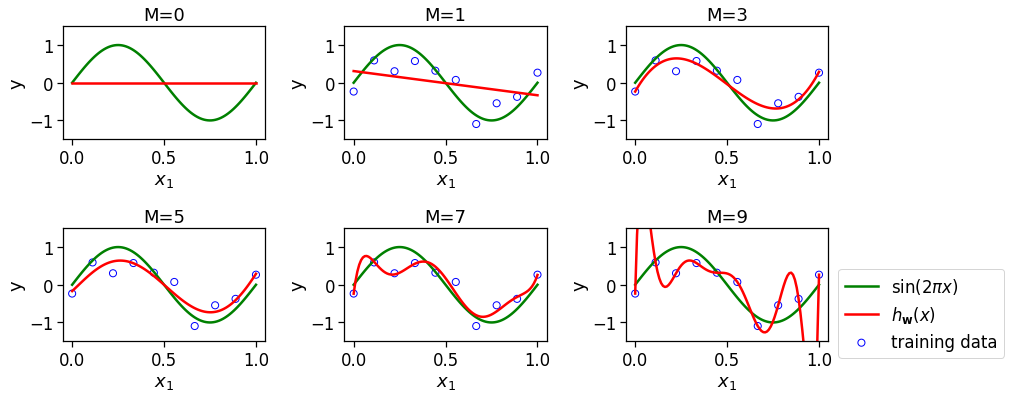

In [ ]:
f=plt.figure(figsize=(12,8))
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})

for i,degree in enumerate([0,1,3,5,7,9]):
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinReg()
  lin_reg.fit(X_transform, y)
  visualize_model_fit(X,y,lin_reg,degree)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

## Model Selection

In [ ]:
#@title [Model Selection Helpers]
import pandas as pd

def convert_dict_to_df(w_dict,degree):
  poly_w_dict = {i: np.array(np.zeros(degree)) for i in range(degree)}
  for deg in poly_w_dict:
    weight_vec = w_dict[deg]
    for i in range(len(weight_vec)):
      poly_w_dict[deg][i] = weight_vec[i]
  
  poly_w_df = pd.DataFrame(poly_w_dict)
  poly_w_df.columns = ['w_'+str(i) for i in range(degree)]
  return poly_w_df

def plot_model_selection(training_errors,val_errors):
  plt.plot(training_errors,'o-',mfc="none",mec="b",ms=10,c="b",label="training erros")
  plt.plot(val_errors,'o-',mfc="none",mec="r",ms=10, c="r", label="validation erros")
  plt.legend()
  plt.xlabel("degree")
  plt.ylabel("RMSE")
  plt.show()


In [ ]:
{i: np.array(np.zeros(3)) for i in range(3)}

{0: array([0., 0., 0.]), 1: array([0., 0., 0.]), 2: array([0., 0., 0.])}

feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 

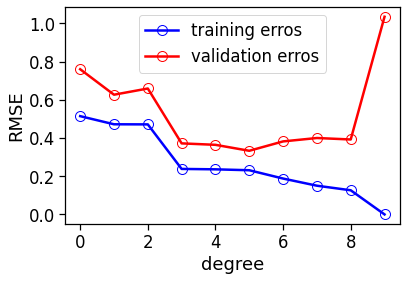

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9
0,-0.011292,0.309576,0.348602,-0.234147,-0.200117,-0.168112,-0.217932,-0.236672,-0.231865,-0.233677
1,0.000000,-0.641736,-0.905164,8.689394,7.413250,4.497636,17.792080,38.058180,3.654428,192.781923
2,0.000000,0.000000,0.263429,-25.023749,-18.579221,5.724235,-158.292887,-492.699404,201.101542,-4167.414120
3,0.000000,0.000000,0.000000,16.858119,6.521350,-62.176418,643.768652,2626.837499,-2606.211315,36742.615706
4,0.000000,0.000000,0.000000,0.000000,5.168384,83.911581,-1280.310243,-6887.558418,12853.829116,-172001.714437
5,0.000000,0.000000,0.000000,0.000000,0.000000,-31.497279,1182.001868,9359.003981,-31740.667523,471874.495514
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-404.499715,-6338.602558,41611.014196,-783028.317341
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1695.457955,-27661.450262,772187.481493
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7339.227054,-415839.043575
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94039.615695


In [ ]:
training_errors=[]
val_errors=[]
w_dict={}

X_val = np.linspace(0,1,100)
y_val = nonlin(X_val)

for i in range(10):
  X_transform = polynomial_transform(X,i)
  X_val_transform = polynomial_transform(X_val,i)
  lin_reg = LinReg()
  lin_reg.fit(X_transform,y)

  w_dict[i] = lin_reg.w
  training_errors.append(lin_reg.rmse(X_transform,y))
  val_errors.append(lin_reg.rmse(X_val_transform,
                                 y_val+np.random.normal(scale=0.25,size=len(y_val))))
plot_model_selection(training_errors,val_errors)
convert_dict_to_df(w_dict,10)



Observation:
- Higher order polynomial terms are assigned larger weights. the larger weights are problematic as small change in the input causes a large change in the output.

This problem is called "high variance" problem or overfitting problem.


## Fixing Overfitting

1. Increase the training samples/data. Increase the above training samples to 100

### Ridge Regression

In [ ]:
#@title [Linear Regression Class with Regularization Rate]
class LinRegOF(object):
  '''
  Linear Regression model
  -----------------------
  y=X@w
  X:A feature matrix
  w: weight vector
  y:label vector
  '''
  def __init__(self):
    self.t0= 200
    self.t1 = 100000
  
  def predict(self,X:np.ndarray) -> np.ndarray:
    '''
    Prediction of output label for a given input.

    Args:
    X: Feature matrix for given inputs
    Returns:
    y: Output label vector as predicted by the given model.
    '''
    y=X@self.w
    return y

  def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float) -> float:
    '''
    Calculates loss for a model based on known labels

    Args:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Return:
    Loss
    '''
    e = y-self.predict(X)
    return (1/2)*(np.transpose(e)@e)+(reg_rate/2)*(np.transpose(self.w)@self.w)

  def rmse(self, X,y,reg_rate):
    '''Calculates root mean squared error of prediction w.r.t actual label.'''
    return np.sqrt((2/X.shape[0])* self.loss(X,y,reg_rate))
  
  def fit(self,X:np.ndarray,y:np.ndarray,reg_rate:float) -> np.ndarray:
    '''Estimates parameters of the linear regression model with normal equation
    Args:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Returns:
    Weight vector
    '''
    self.w = np.zeros((X.shape[1]))
    #np.size(X,1) gives number of columns in feature Matrix
    eye = np.eye(np.size(X,1))
    self.w = np.linalg.solve(
                            reg_rate*eye + X.T @ X,
                             X.T@y,)
    return self.w

  def calculate_gradient(self,X,y,reg_rate:float):
    '''
    Calculate gradient of loss function w.r.t weight vector on training set.

    Arguments:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Returns:
    A vector of gradients.
    '''
    return np.transpose(X)@(self.predict(X)-y)+reg_rate*self.w

  def update_weights(self,grad,lr):
    return self.w-lr*grad

  def learning_schedule(self,t):
    return self.t0/(t+self.t1)

  def gd(self,X,y,num_epochs,lr):
    self.w = np.zeros((X.shape[1]))
    self.w_all, self.err_all = [],[]
    for i in np.arange(0,num_epochs):
      dJdW = self.calculate_gradient(X,y)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      self.w = self.update_weights(dJdW,lr)
    return self.w

  def mbgd(self,X,y,num_epochs,batch_size):
    self.w = np.zeros((X.shape[1]))
    self.w_all, self.err_all = [],[]
    mini_batch_id=0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0,X.shape[0],batch_size):
        mini_batch_id+=1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))

        dJdW = 2/batch_size * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(dJdW, self.learning_schedule(mini_batch_id))
    return self.w

  def sgd(self,X,y,num_epochs:int):
    self.w_all,self.err_all = [],[]
    self.w= np.zeros((X.shape[1]))
    

    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index = np.random.randint(X.shape[0])
        xi =X[random_index:random_index+1]
        yi =y[random_index:random_index+1]
        self.err_all.append(self.loss(xi,yi))

        gradients = 2 * self.calculate_gradient(xi,yi)
        lr = self.learning_schedule(epoch*X.shape[0]+i)

        self.w=self.update_weights(gradients,lr)
        self.w_all.append(self.w)
    return self.w

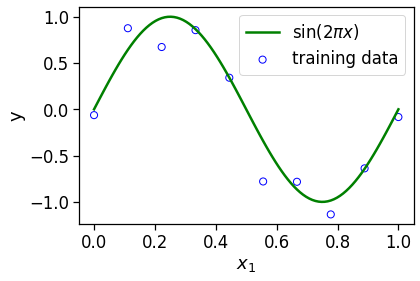

In [ ]:
num_samples=10
X,y = create_nonlin_training_set(nonlin,num_samples,0.2)
visualize_training_data(X,y)

In [ ]:
# @title [Visualization]
def visualize_training_data(X_train,y_train):
  points = np.linspace(0,1,100)
  output = nonlin(points)

  plt.scatter(X_train, y_train, facecolor="none"
  ,edgecolor="b",s=50, label="training data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.legend()
  plt.show()

def visualize_model_fit(X, y, lin_reg, degree):
  '''Plots trained model along with the data generation function'''
  points = np.linspace(0,1,100)
  output = nonlin(points)

  if degree>0:
    plt.scatter(X, y, facecolor="none", edgecolors="b",s=50,
                label="training data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")

  y_hat = lin_reg.predict(polynomial_transform(points,degree))
  plt.plot(points,y_hat,c="r",label="$h_\mathbf{w}(x)$")
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.ylim(-1.5,1.5)
  plt.title("M={}, $\lambda=0$".format(degree)) #xy=(-0.15,1)
    


feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 

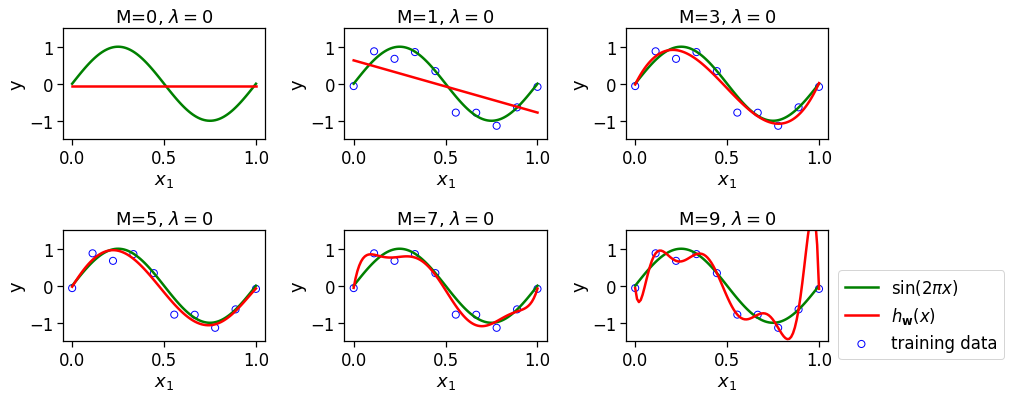

In [ ]:
#@title Polynomial Model without Regularization
f=plt.figure(figsize=(12,8))
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})

for i,degree in enumerate([0,1,3,5,7,9]):
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinReg()
  lin_reg.fit(X_transform, y)
  visualize_model_fit(X,y,lin_reg,degree)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

In [ ]:
# @title [Visualization for Ridge]
def visualize_training_data(X_train,y_train):
  points = np.linspace(0,1,100)
  output = nonlin(points)

  plt.scatter(X_train, y_train, facecolor="none"
  ,edgecolor="b",s=50, label="training data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.legend()
  plt.show()

def visualize_model_fit(X, y, lin_reg, degree,reg_rate):
  '''Plots trained model along with the data generation function'''
  points = np.linspace(0,1,100)
  output = nonlin(points)

  if degree>0:
    plt.scatter(X, y, facecolor="none", edgecolors="b",s=50,
                label="training data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")

  y_hat = lin_reg.predict(polynomial_transform(points,degree))
  plt.plot(points,y_hat,c="r",label="$h_\mathbf{w}(x)$")
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.ylim(-1.5,1.5)
  plt.title("M={}, $\lambda$={}".format(degree,reg_rate)) #xy=(-0.15,1)
    


feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 

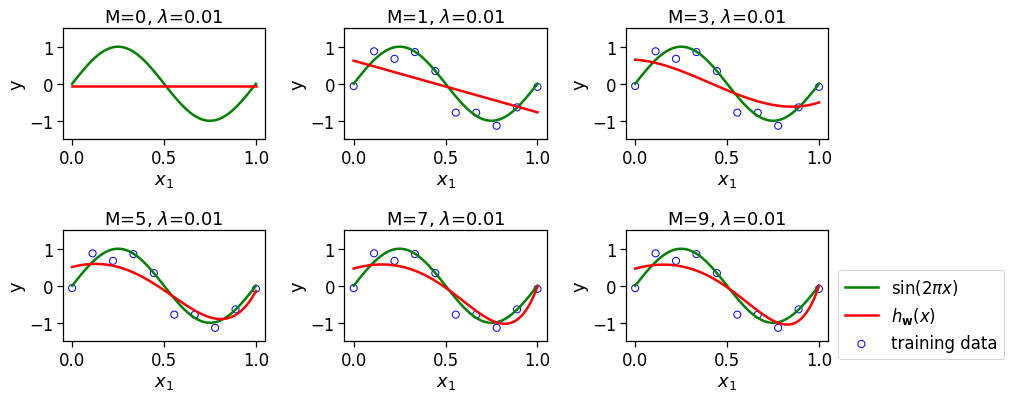

In [ ]:
#@title Polynomial Model with Ridge
f=plt.figure(figsize=(12,8))
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})

for i,degree in enumerate([0,1,3,5,7,9]):
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinRegOF()
  lin_reg.fit(X_transform, y,reg_rate=0.01)
  visualize_model_fit(X,y,lin_reg,degree,reg_rate=0.01)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 

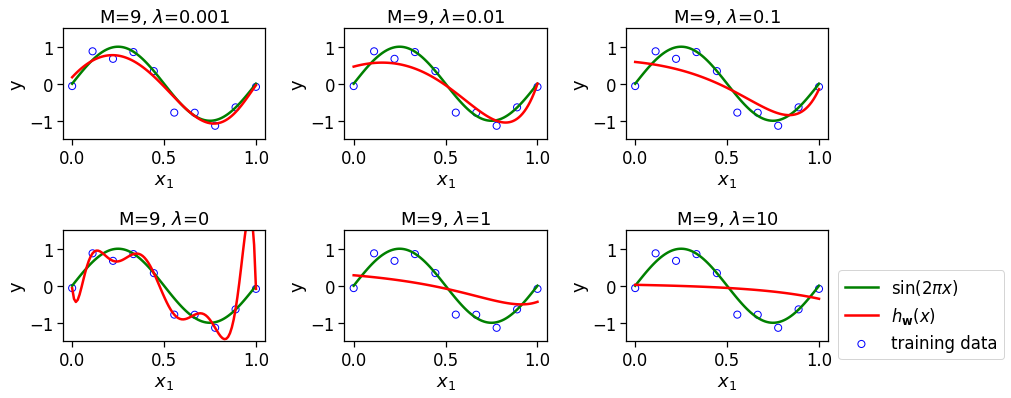

In [ ]:
#@title Polynomial Regression of fixed degree and varying regularization rate
f=plt.figure(figsize=(12,8))
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})
degree=9
for i,reg_rate in enumerate([1e-3,1e-2,1e-1,0,1,10]):
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinRegOF()
  lin_reg.fit(X_transform, y,reg_rate)
  visualize_model_fit(X,y,lin_reg,degree,reg_rate)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

#### Model Selection

In [ ]:
#@title Model Selection Helper function
def plot_reg_w(w_df):
  ax = plt.gca()
  ax.plot(w_df.T)
  ax.set_xscale('log')
  ax.set_xlim(ax.get_xlim()[::-1])
  plt.xlabel('$\lambda$')
  plt.ylabel('$\mathbf{w}$')
  plt.title('Weights as a function of $\lambda$')
  plt.axis('tight')
  plt.show()

def plot_learning_curve(err_df):
  ax = plt.gca()
  ax.plot(err_df)
  ax.set_xscale('log')
  ax.set_xlim(ax.get_xlim()[::-1])
  plt.xlabel('$\lambda$')
  plt.ylabel('RMSE')
  plt.title('Training and validation losses as a function of $\lambda$')
  plt.axis('tight')
  plt.legend(['training','validation'])
  plt.show()

In [ ]:
training_errors={}
val_errors={}
w_dict={}
degree=9
X_val = np.linspace(0,1,100)
y_val = nonlin(X_val)
X_transform = polynomial_transform(X,degree)
X_val_transform = polynomial_transform(X_val,degree)

feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]


In [ ]:


for reg_rate in [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]:
  
  lin_reg = LinRegOF()
  lin_reg.fit(X_transform,y,reg_rate)

  w_dict[reg_rate] = lin_reg.w
  training_errors[reg_rate]=lin_reg.rmse(X_transform,y,reg_rate)

  lin_reg.fit(X_val_transform, y_val, reg_rate)
  val_errors[reg_rate]=lin_reg.rmse(X_val_transform,
                                 y_val+np.random.normal(scale=0.25,size=len(y_val)),reg_rate)
err_df = pd.DataFrame([training_errors,val_errors]).T
w_df = pd.DataFrame(w_dict)



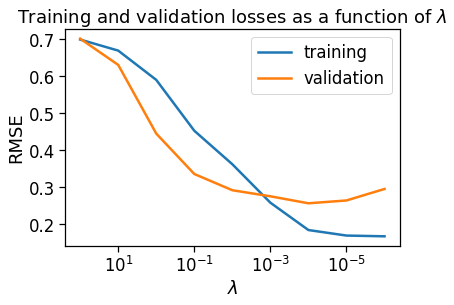

In [ ]:
plot_learning_curve(err_df)

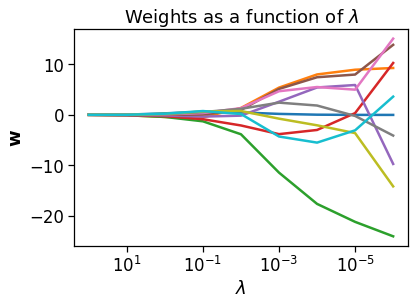

In [ ]:
plot_reg_w(w_df)

### Lasso Regrssion

In [ ]:
from sklearn.linear_model import Lasso

#Lasso
reg_rate=0.01
lasso=Lasso(alpha=reg_rate)
lasso.fit(X_transform,y)

#Linear regression
lin_reg=LinRegOF()
_ = lin_reg.fit(X_transform,y,0)

Comparison of weight vectors of linear, ridge and lasso regression

In [ ]:
pd.DataFrame({'LinReg':lin_reg.w,'Ridge':w_df[0.01],'Lasso':lasso.coef_})

,LinReg,Ridge,Lasso
0,-0.062823,0.461993,0.000000
1,-41.864473,1.347829,-0.000000
2,1436.757484,-3.856527,-2.597602
3,-15549.444688,-2.114628,-0.000000
4,83195.493519,-0.171776,0.000000
5,-250515.681323,0.945454,0.000000
6,443497.808495,1.316371,0.000000
7,-457420.866251,1.181720,0.000000
8,254157.456928,0.745029,0.000000
9,-58759.680534,0.146867,1.879989


**Observations:**
1. Lasso obtains a sparse feature vector. Many 0 coefficients or weights
2. Ridge regression assigns small weights to each feature

A couple of points about Lasso and Ridge:
- Lasso is used for feature selection.
- While modeling relationship between feature and labels,
  - When all features are useful for making prediction about the output, we use ridge regression. It produces a weight vector with small non-zero values to all features.
  - When a few features are useful for making predictions, we use lasso, It produces a weight vector that assigns 0 weights to unimportant features.

feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

Text(0.5, 1.0, 'Lasso (M=9, $\\lambda=0.01$)')

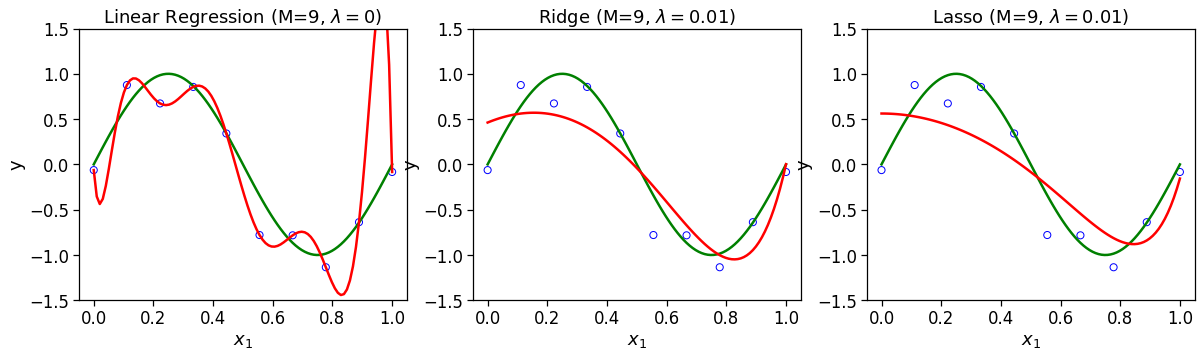

In [ ]:
f=plt.figure(figsize=(20,5))
ax1 = plt.subplot(1,3,1)
visualize_model_fit(X,y,lin_reg,degree,reg_rate=0)
plt.title('Linear Regression (M=9, $\lambda=0$)')

lin_reg.w=w_df[0.01]
ax2 = plt.subplot(1,3,2)
visualize_model_fit(X,y,lin_reg,degree,reg_rate=0.01)
plt.title('Ridge (M=9, $\lambda=0.01$)')

ax3 = plt.subplot(1,3,3)
visualize_model_fit(X,y,lasso,degree,reg_rate=0.01)
plt.title('Lasso (M=9, $\lambda=0.01$)')


feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-init

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.046e-03, tolerance: 4.940e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


 [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.442e-01, tolerance: 4.940e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_

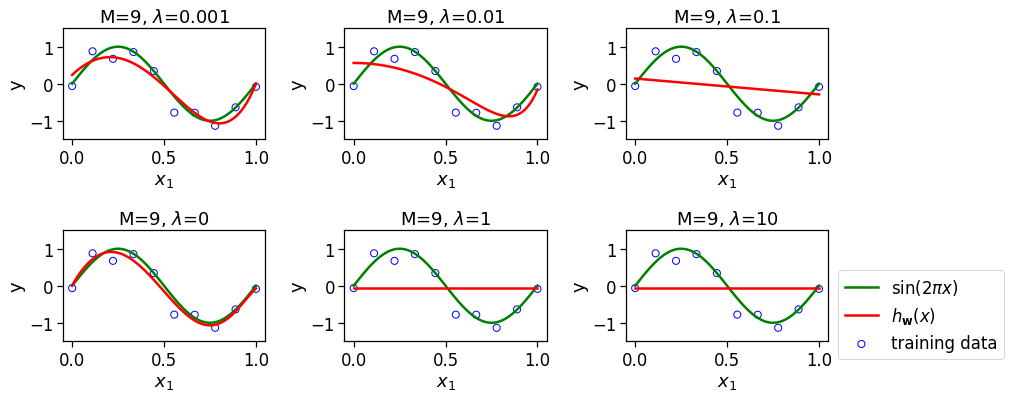

In [ ]:
#@title Lasso Regression of fixed degree and varying regularization rate
f=plt.figure(figsize=(12,8))
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})
degree=9
X_transform=polynomial_transform(X,degree)
for i,reg_rate in enumerate([1e-3,1e-2,1e-1,0,1,10]):
  plt.subplot(3,3,i+1)
  lasso=Lasso(alpha=reg_rate)
  lasso.fit(X_transform, y)
  visualize_model_fit(X,y,lasso,degree,reg_rate)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

#### Model Selection

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error

training_errors={}
val_errors={}
w_dict={}
degree=9

X_val = np.linspace(0,1,100)
y_val = nonlin(X_val)

X_transform = polynomial_transform(X,degree)
X_val_transform = polynomial_transform(X_val,degree)

feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
feature-initial [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]


In [ ]:
for reg_rate in [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]:
  
  lasso = Lasso(alpha=reg_rate)
  lasso.fit(X_transform,y)

  w_dict[reg_rate] = lasso.coef_
  training_errors[reg_rate]=mean_squared_error(y,lasso.predict(X_transform),squared=False)
  val_errors[reg_rate]=mean_squared_error(
                                 y_val+np.random.normal(scale=0.25,size=len(y_val)),lasso.predict(X_val_transform),squared=False)
err_df = pd.DataFrame([training_errors,val_errors]).T
w_df = pd.DataFrame(w_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e-01, tolerance: 4.940e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.384e-01, tolerance: 4.940e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

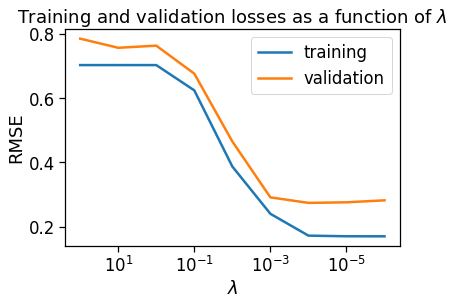

In [ ]:
plot_learning_curve(err_df)

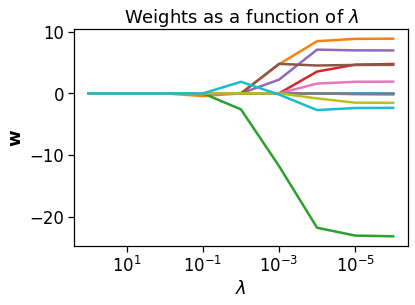

In [ ]:
plot_reg_w(w_df)

# Multi-output/Multi-label Regression

In [ ]:
from sklearn.datasets import make_regression
X,y, coef = make_regression(n_samples=100, n_features=10, n_informative=10, bias=1, n_targets=5,shuffle=True,coef=True, random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

(100, 10)
(100, 5)


In [ ]:
print("Sample training examples:\n",X[:5])
print("Corresponding labels:\n",y[:5])

Sample training examples:
 [[-2.07339023 -0.37144087  1.27155509  1.75227044  0.93567839 -1.40751169
  -0.77781669 -0.34268759 -1.11057585  1.24608519]
 [-0.90938745 -1.40185106 -0.50347565 -0.56629773  0.09965137  0.58685709
   2.19045563  1.40279431 -0.99053633  0.79103195]
 [-0.18565898 -1.19620662 -0.64511975  1.0035329   0.36163603  0.81252582
   1.35624003 -1.10633497 -0.07201012 -0.47917424]
 [ 0.03526355  0.21397991 -0.57581824  0.75750771 -0.53050115 -0.11232805
  -0.2209696  -0.69972551  0.6141667   1.96472513]
 [-0.51604473 -0.46227529 -0.8946073  -0.47874862  1.25575613 -0.43449623
  -0.30917212  0.09612078  0.22213377  0.93828381]]
Corresponding labels:
 [[-133.15919852  -88.95797818   98.19127175   25.68295511 -132.79294654]
 [-110.38909784  146.04459736 -169.58916067  118.96066861 -177.08414159]
 [ -97.80350267    4.32654061  -87.56082281   -5.58466452    6.36897388]
 [  25.39024616  -70.41180117  186.15213706  132.77153362   53.42301307]
 [-140.61925153  -53.87007831 -1

In [ ]:
coef

array([[93.62122462,  5.19712837, 54.12963353, 70.90605195, 87.09691237],
       [89.48166561, 54.75923762, 81.729777  , 45.23182845, 64.35776952],
       [46.26229567, 86.82725054, 72.71690698, 74.27065212, 42.54933344],
       [71.92017783, 22.84547413, 99.63339161, 97.47931621, 65.03256863],
       [19.95424509, 68.02282424,  7.2198409 ,  3.06525022, 25.76828885],
       [52.64026609, 73.15895218,  8.1629982 ,  6.0352084 , 24.7103234 ],
       [15.95446801, 87.17835666, 21.92139874, 97.58652558, 33.68957918],
       [71.40869321, 80.17280831, 33.94501925, 81.48251137,  8.01148464],
       [18.21179157, 78.96985071, 65.87077755, 49.81957165, 55.53635509],
       [16.74825823, 10.45678403, 63.64302495, 70.64757265,  3.15861448]])

In [ ]:
#@title Preprocessing: Dummy feature and train-test split { display-mode: "form" }
from sklearn.model_selection import train_test_split
def add_dummy_feature(x):
  '''Adds a dummy feature to the dataset
  Args:
  x:Training dataset

  Returns 
    Training dataset with an addtion of dummy featue
  '''

  # np.ones(x.shape[0]) create a vector of 1's having the same number
  # rows as number of samples in dataset
  return np.column_stack((np.ones(x.shape[0]),x))
def preprocess(X,y):
  X = add_dummy_feature(X)
  X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.20, random_state=42
    )
  
  return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = preprocess(X,y)

In [ ]:
#@title [Linear Regression Class for Multi-Output Regression]
class LinRegMulti(object):
  '''
  Linear Regression model
  -----------------------
  y=X@w
  X:A feature matrix
  w: weight vector
  y:label vector
  '''
  def __init__(self):
    self.t0= 200
    self.t1 = 100000
  
  def predict(self,X:np.ndarray) -> np.ndarray:
    '''
    Prediction of output label for a given input.

    Args:
    X: Feature matrix for given inputs
    Returns:
    y: Output label vector as predicted by the given model.
    '''
    y=X@self.w
    return y

  def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float) -> float:
    '''
    Calculates loss for a model based on known labels

    Args:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Return:
    Loss
    '''
    e = y-self.predict(X)
    return (1/2)*(np.transpose(e)@e)+(reg_rate/2)*(np.transpose(self.w)@self.w)

  def rmse(self, X,y,reg_rate):
    '''Calculates root mean squared error of prediction w.r.t actual label.'''
    return np.sqrt((2/X.shape[0])* self.loss(X,y,reg_rate))
  
  def fit(self,X:np.ndarray,y:np.ndarray,reg_rate:float) -> np.ndarray:
    '''Estimates parameters of the linear regression model with normal equation
    Args:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Returns:
    Weight vector
    '''
    self.w = np.zeros((X.shape[1],y.shape[1]))
    eye = np.eye(np.size(X,1))
    self.w = np.linalg.solve(
                            reg_rate*eye + X.T @ X,
                             X.T@y,)
    return self.w

  def calculate_gradient(self,X,y,reg_rate:float):
    '''
    Calculate gradient of loss function w.r.t weight vector on training set.

    Arguments:
    X:Feature matrix for given inputs
    y: Output label vector as predicted by the given model

    Returns:
    A vector of gradients.
    '''
    return np.transpose(X)@(self.predict(X)-y)+reg_rate*self.w

  def update_weights(self,grad,lr):
    return self.w-lr*grad

  def learning_schedule(self,t):
    return self.t0/(t+self.t1)

  def gd(self,X,y,num_epochs,lr,reg_rate:float):
    self.w = np.zeros((X.shape[1],y.shape[1]))
    self.w_all, self.err_all = [],[]
    for i in np.arange(0,num_epochs):
      dJdW = self.calculate_gradient(X,y,reg_rate)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,reg_rate))
      self.w = self.update_weights(dJdW,lr)
    return self.w

  def mbgd(self,X,y,num_epochs,batch_size):
    self.w = np.zeros((X.shape[1],y.shape[1]))
    self.w_all, self.err_all = [],[]
    mini_batch_id=0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0,X.shape[0],batch_size):
        mini_batch_id+=1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi,reg_rate))

        dJdW = 2/batch_size * self.calculate_gradient(xi,yi,reg_rate)
        self.w = self.update_weights(dJdW, self.learning_schedule(mini_batch_id))
    return self.w

  def sgd(self,X,y,num_epochs:int):
    self.w_all,self.err_all = [],[]
    self.w = np.zeros((X.shape[1],y.shape[1]))
    

    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index = np.random.randint(X.shape[0])
        xi =X[random_index:random_index+1]
        yi =y[random_index:random_index+1]
        self.err_all.append(self.loss(xi,yi,reg_rate))

        gradients = 2 * self.calculate_gradient(xi,yi,reg_rate)
        lr = self.learning_schedule(epoch*X.shape[0]+i)

        self.w=self.update_weights(gradients,lr)
        self.w_all.append(self.w)
    return self.w

In [ ]:
lin_reg=LinRegMulti()
w=lin_reg.fit(X_train,y_train,reg_rate=0)

#Check if the weight vector is same as the coefficient vector used for making the data:
np.testing.assert_almost_equal(w[1:,:],coef,decimal=2)

In [ ]:
w

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [93.62122462,  5.19712837, 54.12963353, 70.90605195, 87.09691237],
       [89.48166561, 54.75923762, 81.729777  , 45.23182845, 64.35776952],
       [46.26229567, 86.82725054, 72.71690698, 74.27065212, 42.54933344],
       [71.92017783, 22.84547413, 99.63339161, 97.47931621, 65.03256863],
       [19.95424509, 68.02282424,  7.2198409 ,  3.06525022, 25.76828885],
       [52.64026609, 73.15895218,  8.1629982 ,  6.0352084 , 24.7103234 ],
       [15.95446801, 87.17835666, 21.92139874, 97.58652558, 33.68957918],
       [71.40869321, 80.17280831, 33.94501925, 81.48251137,  8.01148464],
       [18.21179157, 78.96985071, 65.87077755, 49.81957165, 55.53635509],
       [16.74825823, 10.45678403, 63.64302495, 70.64757265,  3.15861448]])

In [ ]:
w=lin_reg.gd(X_train,y_train,num_epochs=100,lr=0.01,reg_rate=0)
np.testing.assert_almost_equal(w[1:,:],coef,decimal=2)

In [ ]:
x=np.zeros((20))
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
x[1::2]+=1

In [ ]:
x

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1.])

In [ ]:
y=np.array([[1,2,3],[4,5,6],[7,8,9]])
z=np.array([0,0,0])

In [ ]:
np.column_stack((y,z))

array([[1, 2, 3, 0],
       [4, 5, 6, 0],
       [7, 8, 9, 0]])

In [ ]:
np.c_[y,z]

array([[1, 2, 3, 0],
       [4, 5, 6, 0],
       [7, 8, 9, 0]])